In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
from pprint import pp

from utils import CONFIG

In [108]:
top_k = 50

drop_columns = [
    "device",
    "learning_rate",
    "dataset",
    "batch_size",
    "top_k",
    "seed",
    "Epochs",
    "model"
]

if False:
    for k in CONFIG.top_k:
        if k != top_k:
            drop_columns.extend([f"Precision@{k}", f"Recall@{k}", f"NDCG@{k}"])

print(drop_columns)

['device', 'learning_rate', 'dataset', 'batch_size', 'top_k', 'seed', 'Epochs', 'model']


In [109]:
files = os.listdir("logs")
settings = {}

for fname in files:
    with open(f"logs/{fname}", "r", encoding="utf-8") as fin:
        lines = list(fin)
        epochs, loss, *res = lines[-1].strip().split("\t")

        d = json.loads(lines[0])

        d["Epochs"] = int(epochs)
        d["Loss"] = float(loss)

        for i, k in enumerate(CONFIG.top_k):
            precision, recall, ndcg = res[i * 3:(i * 3)+3]
            d[f"Precision@{k}"] = float(precision)
            d[f"Recall@{k}"] = float(recall)
            d[f"NDCG@{k}"] = float(ndcg)

        settings[fname[:-4]] = d

df = pd.DataFrame(settings).T.convert_dtypes()
df = df.drop(columns=drop_columns)
df.sort_index().where(
    (df["multimodal"] == False) & (df["fusion"] == "max")
).dropna().sort_values(["embedding_dim", "multimodal"])

,n_layers,embedding_dim,epochs,fusion,multimodal,Loss,Precision@5,Recall@5,NDCG@5,Precision@10,Recall@10,NDCG@10,Precision@20,Recall@20,NDCG@20,Precision@50,Recall@50,NDCG@50
2025-01-09T15:41:18,0,64,150,max,False,0.0172,0.0522,0.0401,0.0605,0.0427,0.0642,0.0633,0.0339,0.1011,0.0783,0.0234,0.1722,0.1041
2025-01-09T16:04:50,1,64,150,max,False,0.023,0.0516,0.0406,0.058,0.0448,0.0694,0.0639,0.0358,0.1092,0.0802,0.0254,0.1899,0.1095
2025-01-09T16:46:16,2,64,150,max,False,0.0377,0.0543,0.0418,0.0583,0.0467,0.0701,0.0638,0.0383,0.1138,0.082,0.0282,0.2082,0.1162
2025-01-09T17:48:12,3,64,150,max,False,0.0546,0.0451,0.0342,0.0478,0.0421,0.0625,0.0551,0.0356,0.105,0.0729,0.027,0.1988,0.1068
2025-01-09T15:42:37,0,128,150,max,False,0.0085,0.0642,0.0506,0.0759,0.0502,0.0768,0.077,0.0378,0.1151,0.092,0.0253,0.1897,0.119
2025-01-09T16:06:44,1,128,150,max,False,0.0124,0.0568,0.0455,0.0651,0.0459,0.0721,0.0685,0.0363,0.1138,0.0851,0.025,0.1941,0.1137
2025-01-09T16:48:32,2,128,150,max,False,0.0203,0.0586,0.0464,0.0662,0.0496,0.0771,0.0717,0.0406,0.1242,0.091,0.0281,0.2115,0.1225
2025-01-09T17:51:02,3,128,150,max,False,0.03,0.0526,0.0406,0.0573,0.046,0.0702,0.0638,0.0384,0.1157,0.0826,0.0279,0.2091,0.1162
2025-01-09T15:44:19,0,512,150,max,False,0.0056,0.0704,0.0578,0.0841,0.0544,0.0866,0.0854,0.0404,0.1259,0.1008,0.027,0.2047,0.1294
2025-01-09T16:09:50,1,512,150,max,False,0.0068,0.0582,0.0473,0.0688,0.0486,0.078,0.0738,0.0373,0.1187,0.0901,0.0249,0.1956,0.1173


In [116]:
df.where(df["fusion"] > "max").groupby("n_layers")["Loss"].mean()

n_layers
0     0.01207
1     0.01489
2     0.02154
3    0.033825
Name: Loss, dtype: Float64

In [ ]:
file = os.listdir("logs")[-1]
file = "2025-01-09T15:53:52.log"
file_path = f"logs/{file}"

with open(file_path, 'r') as f:
    config_line = f.readline().strip()
    config = json.loads(config_line)

data = pd.read_csv(file_path, sep='\t', skiprows=1)

In [119]:
data

,Epoch,Loss,Precision@5,Recall@5,NDCG@5,Precision@10,Recall@10,NDCG@10,Precision@20,Recall@20,NDCG@20,Precision@50,Recall@50,NDCG@50
0,1,0.6779,0.0273,0.0189,0.0253,0.0231,0.0316,0.0276,0.0242,0.0658,0.0428,0.0190,0.1290,0.0663
1,2,0.5606,0.0245,0.0166,0.0234,0.0211,0.0282,0.0253,0.0225,0.0607,0.0395,0.0180,0.1213,0.0620
2,3,0.3810,0.0238,0.0161,0.0230,0.0217,0.0289,0.0259,0.0223,0.0606,0.0396,0.0178,0.1205,0.0619
3,4,0.3071,0.0270,0.0191,0.0257,0.0235,0.0319,0.0283,0.0235,0.0639,0.0422,0.0185,0.1255,0.0650
4,5,0.2658,0.0308,0.0218,0.0292,0.0262,0.0362,0.0318,0.0243,0.0662,0.0449,0.0194,0.1320,0.0692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,0.0099,0.0606,0.0492,0.0701,0.0494,0.0790,0.0741,0.0378,0.1219,0.0908,0.0254,0.1996,0.1187
146,147,0.0088,0.0607,0.0492,0.0705,0.0495,0.0792,0.0745,0.0379,0.1220,0.0912,0.0254,0.2003,0.1191
147,148,0.0086,0.0603,0.0490,0.0702,0.0494,0.0790,0.0744,0.0378,0.1212,0.0910,0.0255,0.2000,0.1191
148,149,0.0089,0.0603,0.0489,0.0701,0.0495,0.0797,0.0746,0.0378,0.1218,0.0912,0.0255,0.2006,0.1193


In [120]:
epochs = data["Epoch"]
loss = data["Loss"]

{'n_layers': 3,
 'device': 'cuda',
 'batch_size': 2048,
 'embedding_dim': 2048,
 'learning_rate': 0.001,
 'dataset': 'dbbook',
 'epochs': 150,
 'model': 'ef-mmlgcn',
 'fusion': 'max',
 'top_k': [5,
           10,
           20,
           50],
 'seed': 19,
 'multimodal': False}

Epoch           150.0000
Loss              0.0091
Precision@5       0.0609
Recall@5          0.0495
NDCG@5            0.0702
Precision@10      0.0494
Recall@10         0.0795
NDCG@10           0.0743
Precision@20      0.0378
Recall@20         0.1218
NDCG@20           0.0909
Precision@50      0.0255
Recall@50         0.2002
NDCG@50           0.1190
Name: 149, dtype: float64


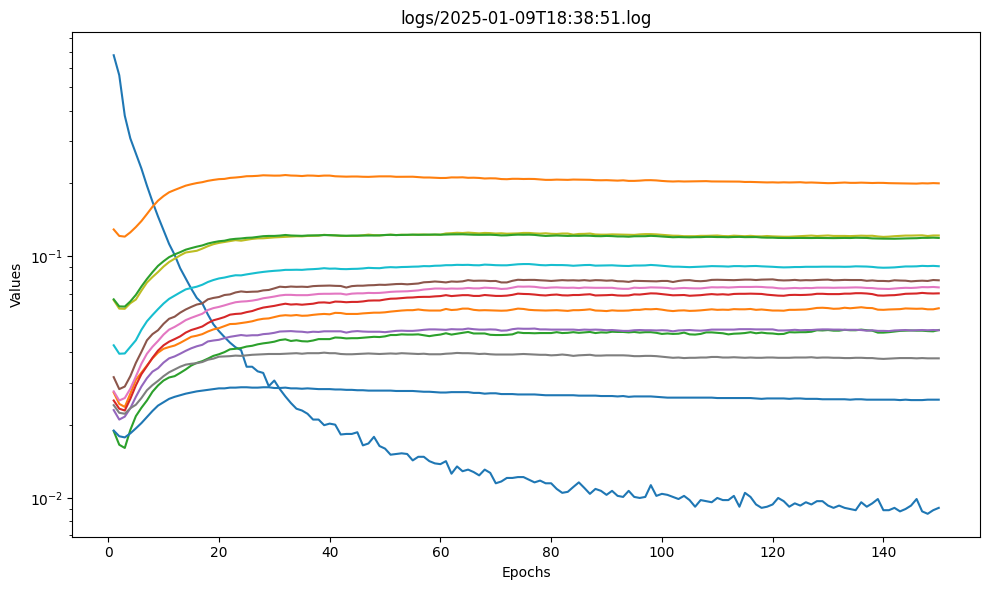

In [123]:
pp(config, width=1)
print()
print(data.iloc[-1])

plt.figure(figsize=(10, 6))

plt.plot(epochs, loss, label="Loss")

for k in CONFIG.top_k:
    plt.plot(epochs, data[f"Precision@{k}"], label=f"Precision@{k}")
    plt.plot(epochs, data[f"Recall@{k}"], label=f"Recall@{k}")
    plt.plot(epochs, data[f"NDCG@{k}"], label=f"NDCG@{k}")


plt.xlabel('Epochs')
plt.ylabel('Values')
plt.title(file_path)
#plt.legend()

plt.gca().yaxis.set_major_locator(plt.MaxNLocator(nbins=30))
plt.yscale("log")

plt.tight_layout()
plt.show()